In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import random

def acao(destino, custo):
    return {"destino": destino, "custo": custo}

estados_romenia = [
    {"estado": "Arad", "acoes": [acao("Zerind", 75), acao("Sibiu", 140), acao("Timisoara", 118)]},
    {"estado": "Zerind", "acoes": [acao("Arad", 75), acao("Oradea", 71)]},
    {"estado": "Timisoara", "acoes": [acao("Arad", 118), acao("Lugoj", 111)]},
    {"estado": "Sibiu","acoes": [acao("Arad", 140), acao("Oradea", 151), acao("Fagaras", 99), acao("Rimnicu Vilcea", 80)]},
    {"estado": "Oradea", "acoes": [acao("Zerind", 71), acao("Sibiu", 151)]},
    {"estado": "Lugoj", "acoes": [acao("Timisoara", 111), acao("Mehadia", 70)]},
    {"estado": "Mehadia", "acoes": [acao("Lugoj", 70), acao("Drobeta", 75)]},
    {"estado": "Drobeta", "acoes": [acao("Mehadia", 75), acao("Craiova", 120)]},
    {"estado": "Craiova", "acoes": [acao("Drobeta", 120), acao("Rimnicu Vilcea", 146), acao("Pitesti", 138)]},
    {"estado": "Rimnicu Vilcea", "acoes": [acao("Sibiu", 80), acao("Craiova", 146), acao("Pitesti", 97)]},
    {"estado": "Fagaras", "acoes": [acao("Sibiu", 99), acao("Bucharest", 211)]},
    {"estado": "Pitesti", "acoes": [acao("Rimnicu Vilcea", 97), acao("Craiova", 138), acao("Bucharest", 101)]},
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 90)]},
    {"estado": "Bucharest", "acoes": [acao("Fagaras", 211), acao("Pitesti", 101), acao("Giurgiu", 90), acao("Urziceni", 85)]},
    {"estado": "Urziceni", "acoes": [acao("Bucharest", 85), acao("Vaslui", 142), acao("Hirsova", 98)]},
    {"estado": "Hirsova", "acoes": [acao("Urziceni", 98), acao("Eforie", 86)]},
    {"estado": "Eforie", "acoes": [acao("Hirsova", 86)]},
    {"estado": "Vaslui", "acoes": [acao("Urziceni", 142), acao("Iasi", 92)]},
    {"estado": "Iasi", "acoes": [acao("Vaslui", 92), acao("Neamt", 87)]},
    {"estado": "Neamt", "acoes": [acao("Iasi", 87)]}
]

def ilustrar_percurso(percurso):
    for i in range(len(percurso)-1):
        print(percurso[i], end=" -> ")
    print(percurso[-1])

def get_estado(estado):
    for e in estados_romenia:
        if e["estado"] == estado:
            return e
    return None

def get_all_acoes(estado):
    return estado["acoes"]

def get_custo_total(percurso):
    custo_total = 0
    for i in range(len(percurso)-1):
        custo_total += get_custo(percurso[i], percurso[i+1])
    return custo_total

def get_all_destinos(estado):
    destinos = []
    for acao in get_all_acoes(get_estado(estado)):
        destinos.append(acao["destino"])
    return destinos

def get_custo(estado, destino):
    for acao in get_all_acoes(get_estado(estado)):
        if acao["destino"] == destino:
            return acao["custo"]
    return False

def dfs(start, goal):
    pilha = [start]
    algoritmo = []
    while pilha:
        estado_atual = pilha.pop()
        algoritmo.append(estado_atual)
        if estado_atual == goal:
           # print("BFS: Fim!")
            return algoritmo
        else:
            all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                    if acao["destino"] == goal:
                        pilha.append(acao["destino"])
                    else:
                        pilha.append(acao["destino"])
    return False
	
def bfs(start, goal):
    fila = [start]
    algoritmo = []
    while fila:
        estado_atual = fila.pop(0) #Simulando uma fila
        algoritmo.append(estado_atual)
        if estado_atual == goal:   
           # print("BFS: Fim!")
            return algoritmo
        else:
            all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in fila:
                    if acao["destino"] == goal:
                        fila.insert(0, acao["destino"])
                    else:
                        fila.append(acao["destino"])
    return False

def get_viable_path_from_algo(algoritmo):
    '''
    Retorna um caminho viável a partir do resultado de um algoritmo de busca
    '''
    viable_path = []
    starting_point = algoritmo[0]
    ending_point = algoritmo[-1]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algoritmo)-1):
        all_destinos = get_all_destinos(ultimo_ponto_de_viabilidade).copy()
        random.shuffle(all_destinos)
        if algoritmo[-1-i] in all_destinos:
            ultimo_ponto_de_viabilidade = algoritmo[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path

def highlight_path(algoritmo, cost, viable_path):
    '''
    Função que desenha o grafo com os estados da Bulgária, o caminho percorrido pelo algoritmo até o ponto final, e um possível caminho viável.
    O custo se dá pelo somatório do custo de deslocamento para cada par de estados do possível caminho viável.
    '''
    G = nx.Graph()
    for estado in estados_romenia:
        for acao in estado["acoes"]:
            G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=5000, node_color='skyblue', font_size=16, width=2, edge_color='black',
    alpha=1, arrows=True, arrowstyle='->',  arrowsize=20, connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1
    , linewidths=1, label='Romenia', font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=13, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
    #increase the size of the graph
    fig = plt.gcf()
    fig.set_size_inches(20.5, 19.5)

    plt.text(-0.00, 0.99, f"Vermelho: Estados visitados pelo algoritmo\nVerde: Rota viável", fontsize=20, bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    for estado in algoritmo:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=5000, alpha=1)
        #Put numbers on top of the nodes according to the order they were visited
        plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(algoritmo.index(estado)), fontsize=30, fontweight='bold', color='white', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=7, foreground='red'), pe.Normal()])
    #Draw a square on the corner of the graph to show the cost
    for estado in viable_path:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='green', node_size=5000, alpha=1)
        plt.text(pos[estado][0]*1, pos[estado][1]+0.1, str(viable_path.index(estado)), fontsize=30, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=7, foreground='green')],
        )

    plt.title(f"Custo total da rota viável: {cost}", fontsize=30, fontweight='bold', color='black', loc='left', horizontalalignment='left', verticalalignment='center')
    

def brute_force_lowest_cost(starting_point, ending_point, search_algo='dfs', max_iter=1000):
    '''
    Função que realiza uma busca em força bruta para encontrar o menor custo de um caminho entre dois pontos.
    '''
    highest_cost = 0
    lowest_cost = 100000
    lowest_cost_path = []
    highest_cost_path = []
    for i in range(max_iter):
        if search_algo == 'dfs':
            algo = dfs(starting_point, ending_point)
        else:
            algo = bfs(starting_point, ending_point)
        viable_path = get_viable_path_from_algo(algo)
        custo_total = get_custo_total(viable_path)
        if custo_total < lowest_cost:
            lowest_cost = custo_total
            lowest_cost_path = viable_path
        if custo_total > highest_cost:
            highest_cost = custo_total
            highest_cost_path = viable_path
    return {'lowest_cost': lowest_cost, 'lowest_cost_path': lowest_cost_path, 'highest_cost': highest_cost, 'highest_cost_path': highest_cost_path}


In [64]:
get_all_destinos('Arad')

['Zerind', 'Sibiu', 'Timisoara']

In [66]:
dfs_algo = dfs("Arad", "Bucharest")
dfs_viable_path = get_viable_path_from_algo(dfs_algo)
dfs_custo_total = get_custo_total(dfs_viable_path)


In [77]:
dfs_algo

['Arad',
 'Zerind',
 'Oradea',
 'Timisoara',
 'Lugoj',
 'Mehadia',
 'Drobeta',
 'Craiova',
 'Pitesti',
 'Bucharest']

In [92]:
bfs_algo = bfs("Arad", "Bucharest")
bfs_viable_path = get_viable_path_from_algo(bfs_algo)
bfs_custo_total = get_custo_total(bfs_viable_path)

In [68]:
ilustrar_percurso(dfs_viable_path)

Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucharest


In [76]:
ilustrar_percurso(bfs_viable_path)

Arad -> Sibiu -> Fagaras -> Bucharest


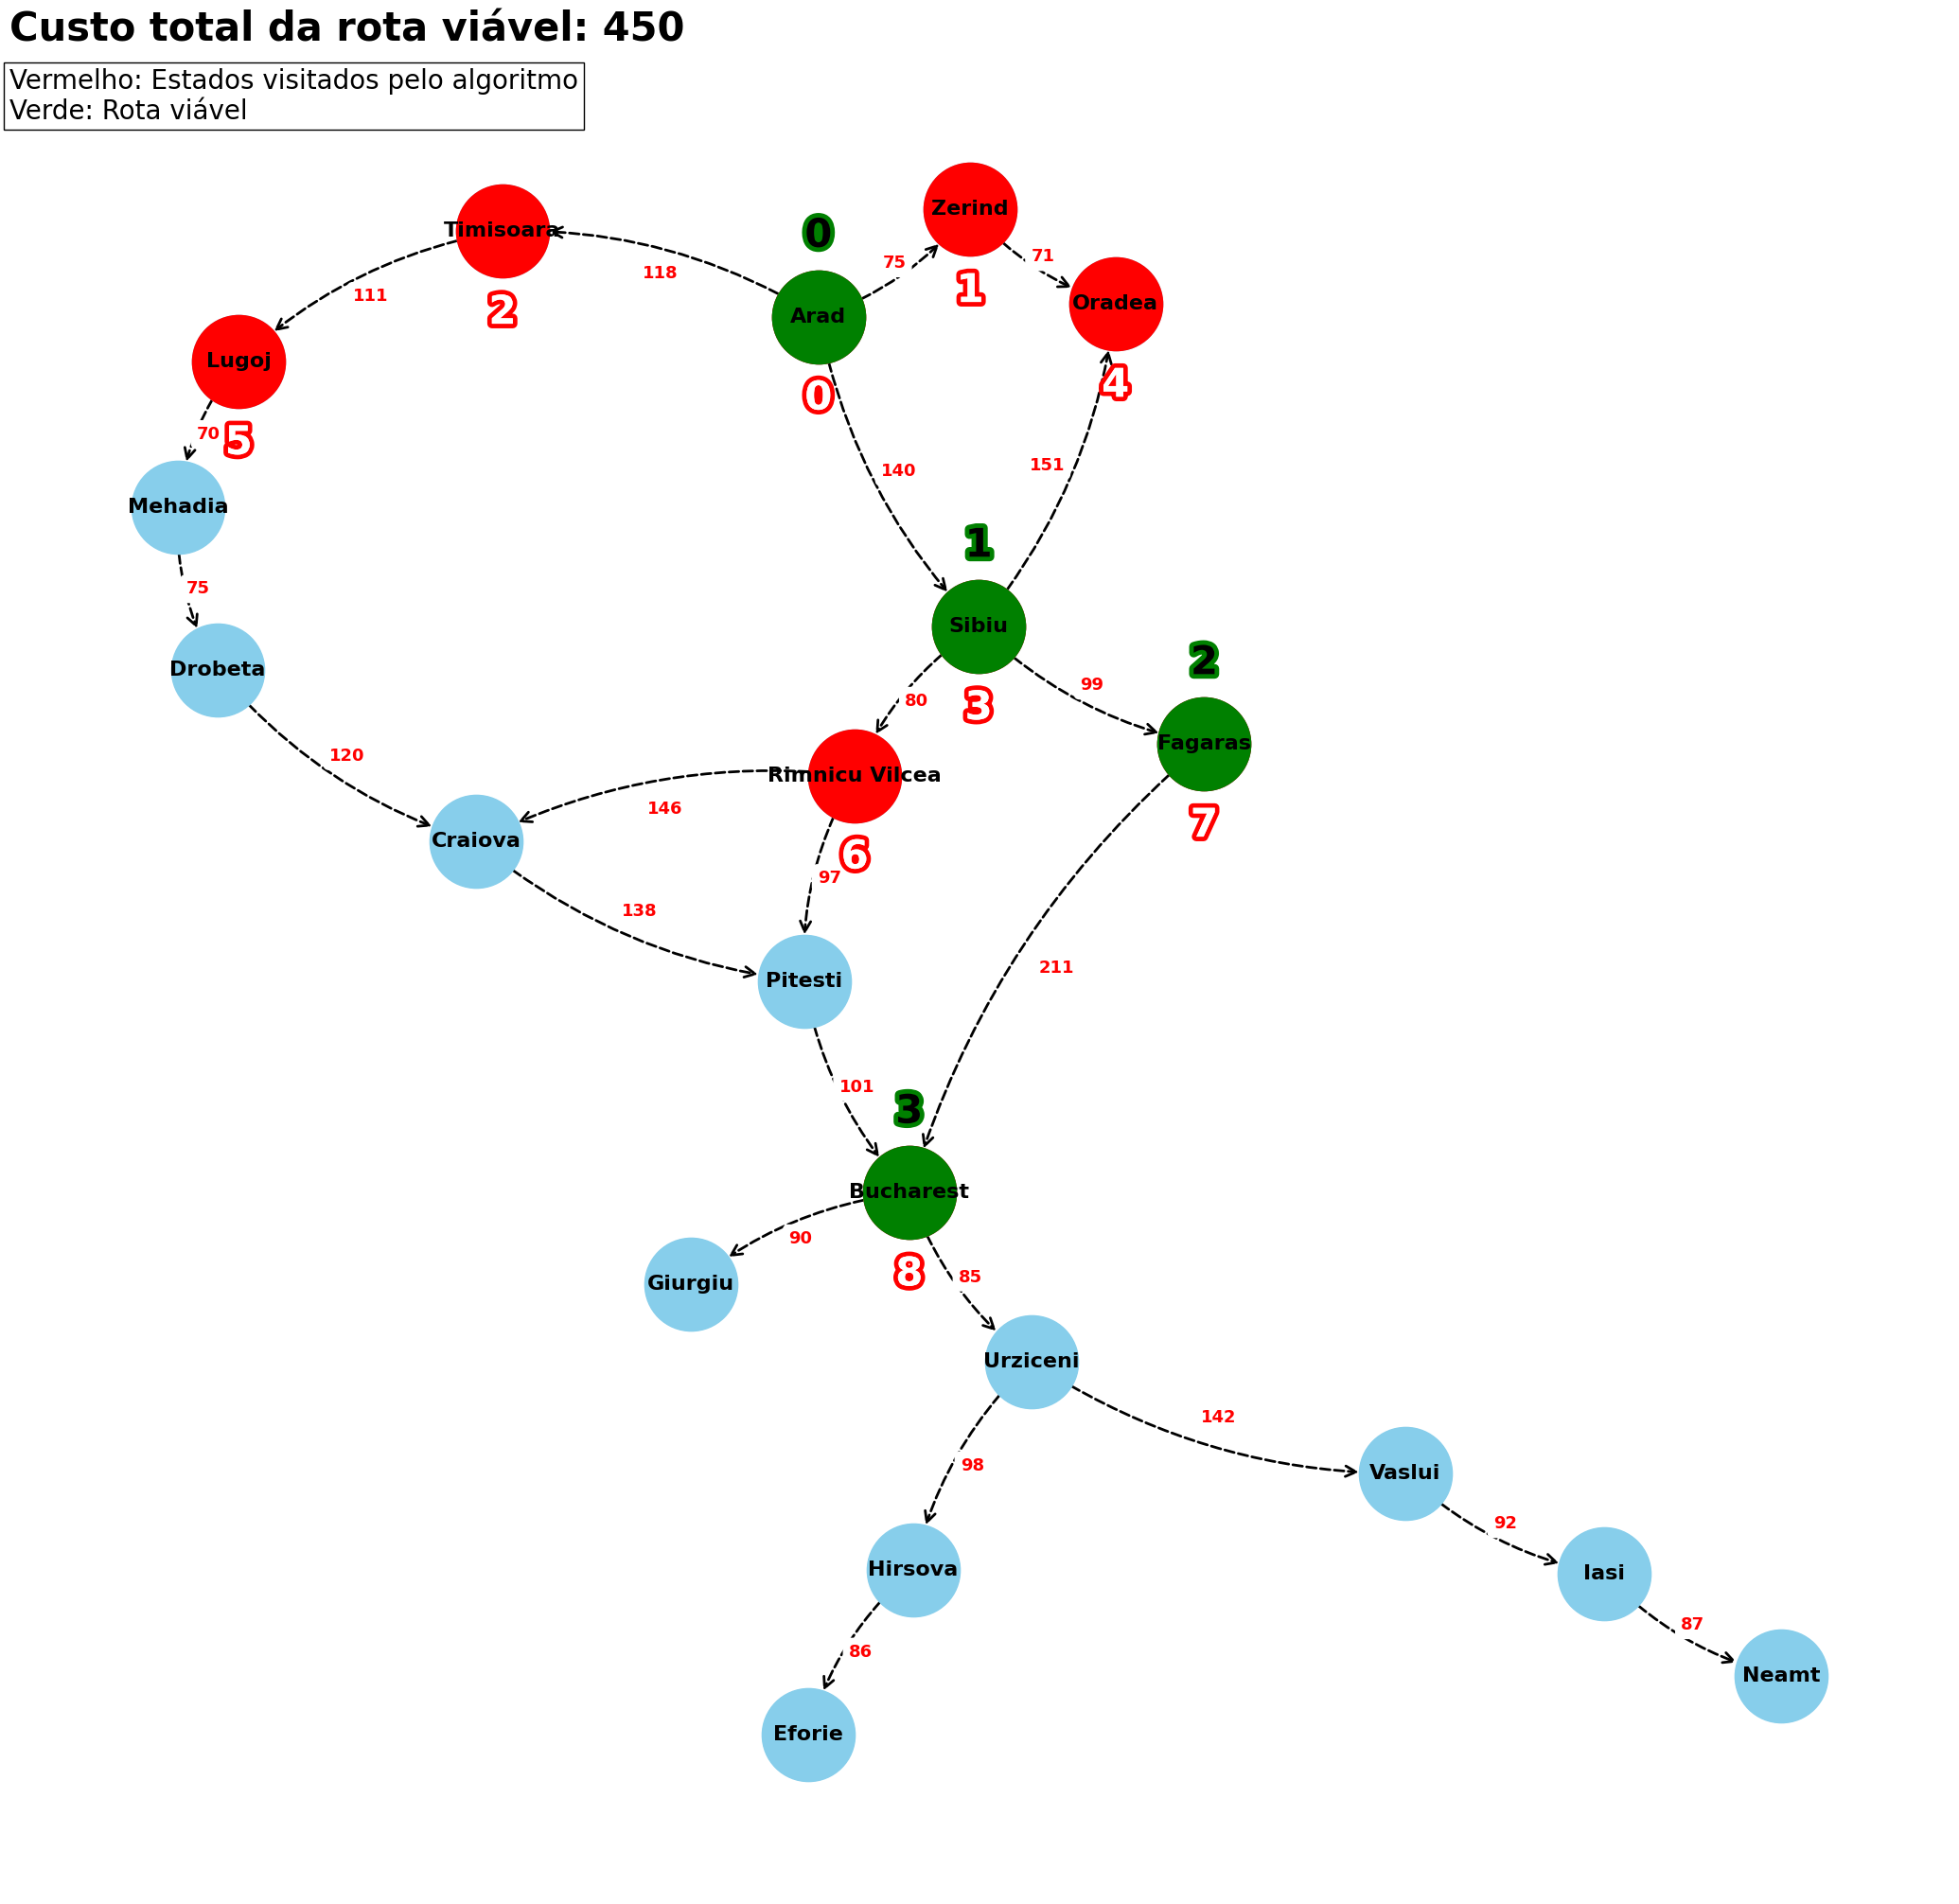

In [93]:

highlight_path(bfs_algo, bfs_custo_total, bfs_viable_path)

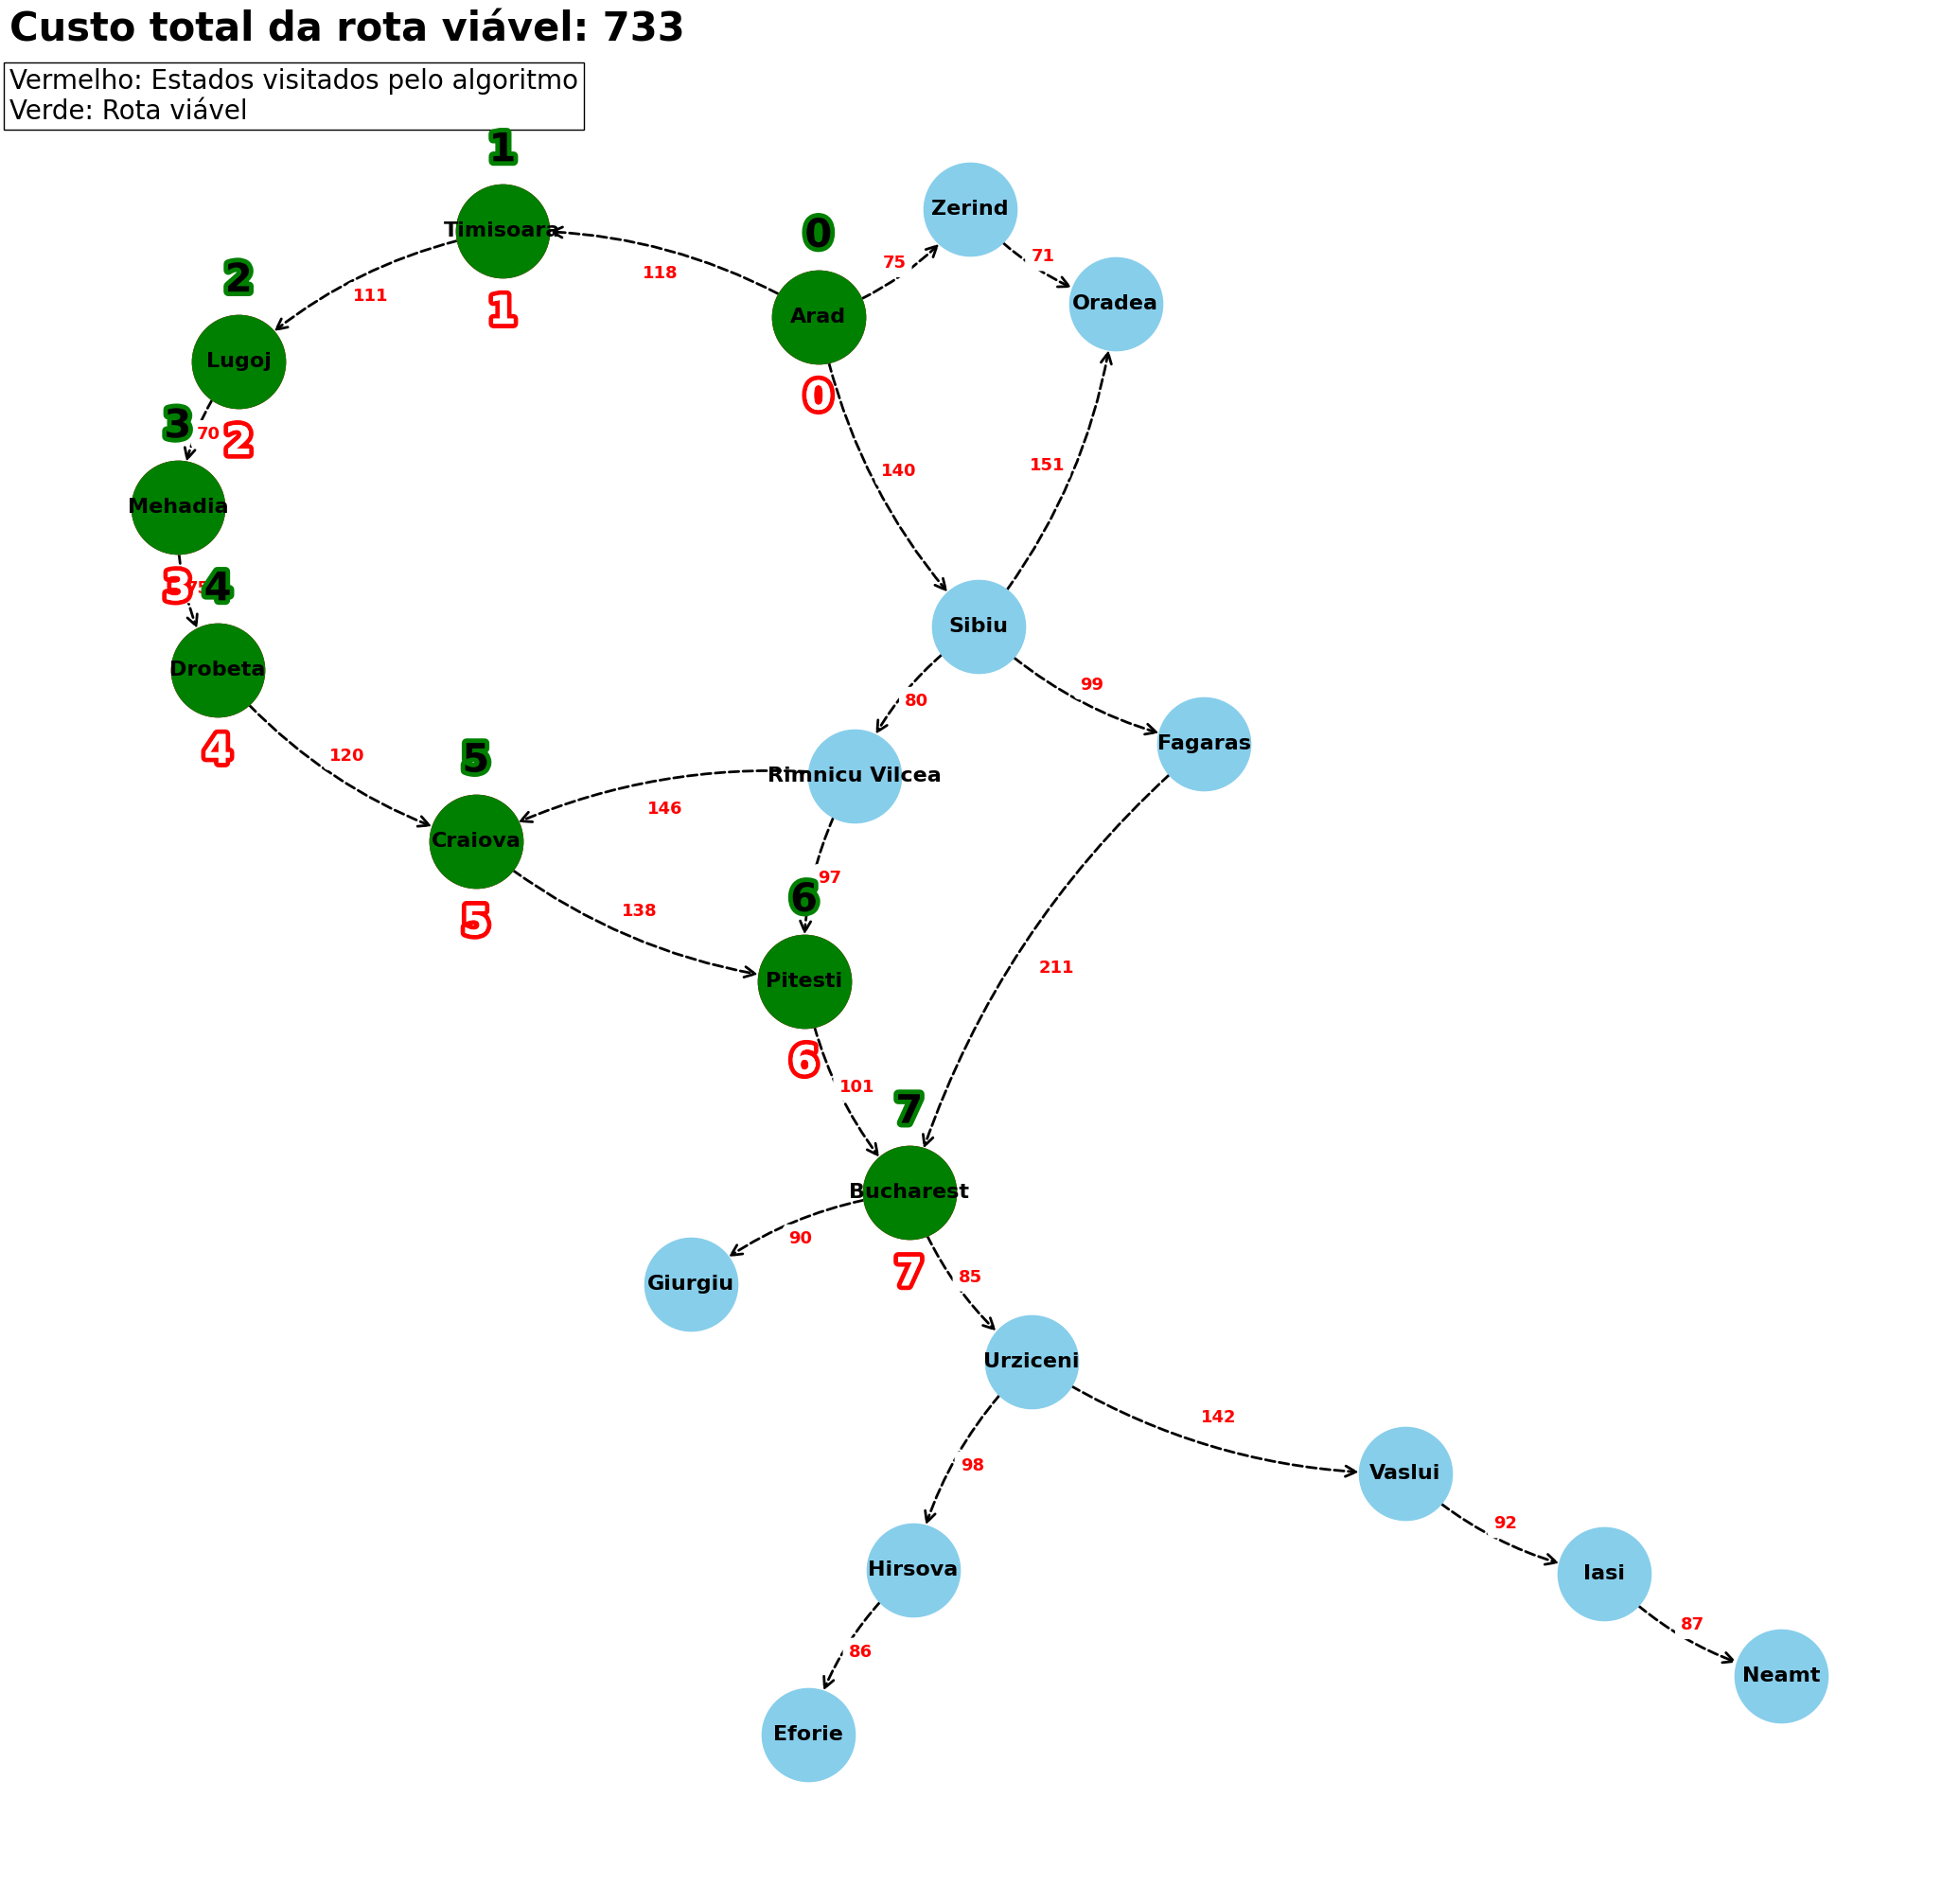

In [8]:
highlight_path(dfs_algo, dfs_custo_total, dfs_viable_path)

In [95]:
arad_bucharest_dfs_custos = brute_force_lowest_cost("Arad", "Bucharest", search_algo='dfs')
arad_bucharest_bfs_custos = brute_force_lowest_cost("Arad", "Bucharest", search_algo='bfs')

In [97]:
arad_bucharest_dfs_custos['lowest_cost_path']

['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']

O menor custo encontrado pelo algoritmo DFS foi de 418
O maior custo encontrado pelo algoritmo DFS foi de 838
O menor custo encontrado pelo algoritmo BFS foi de 450
O maior custo encontrado pelo algoritmo BFS foi de 450


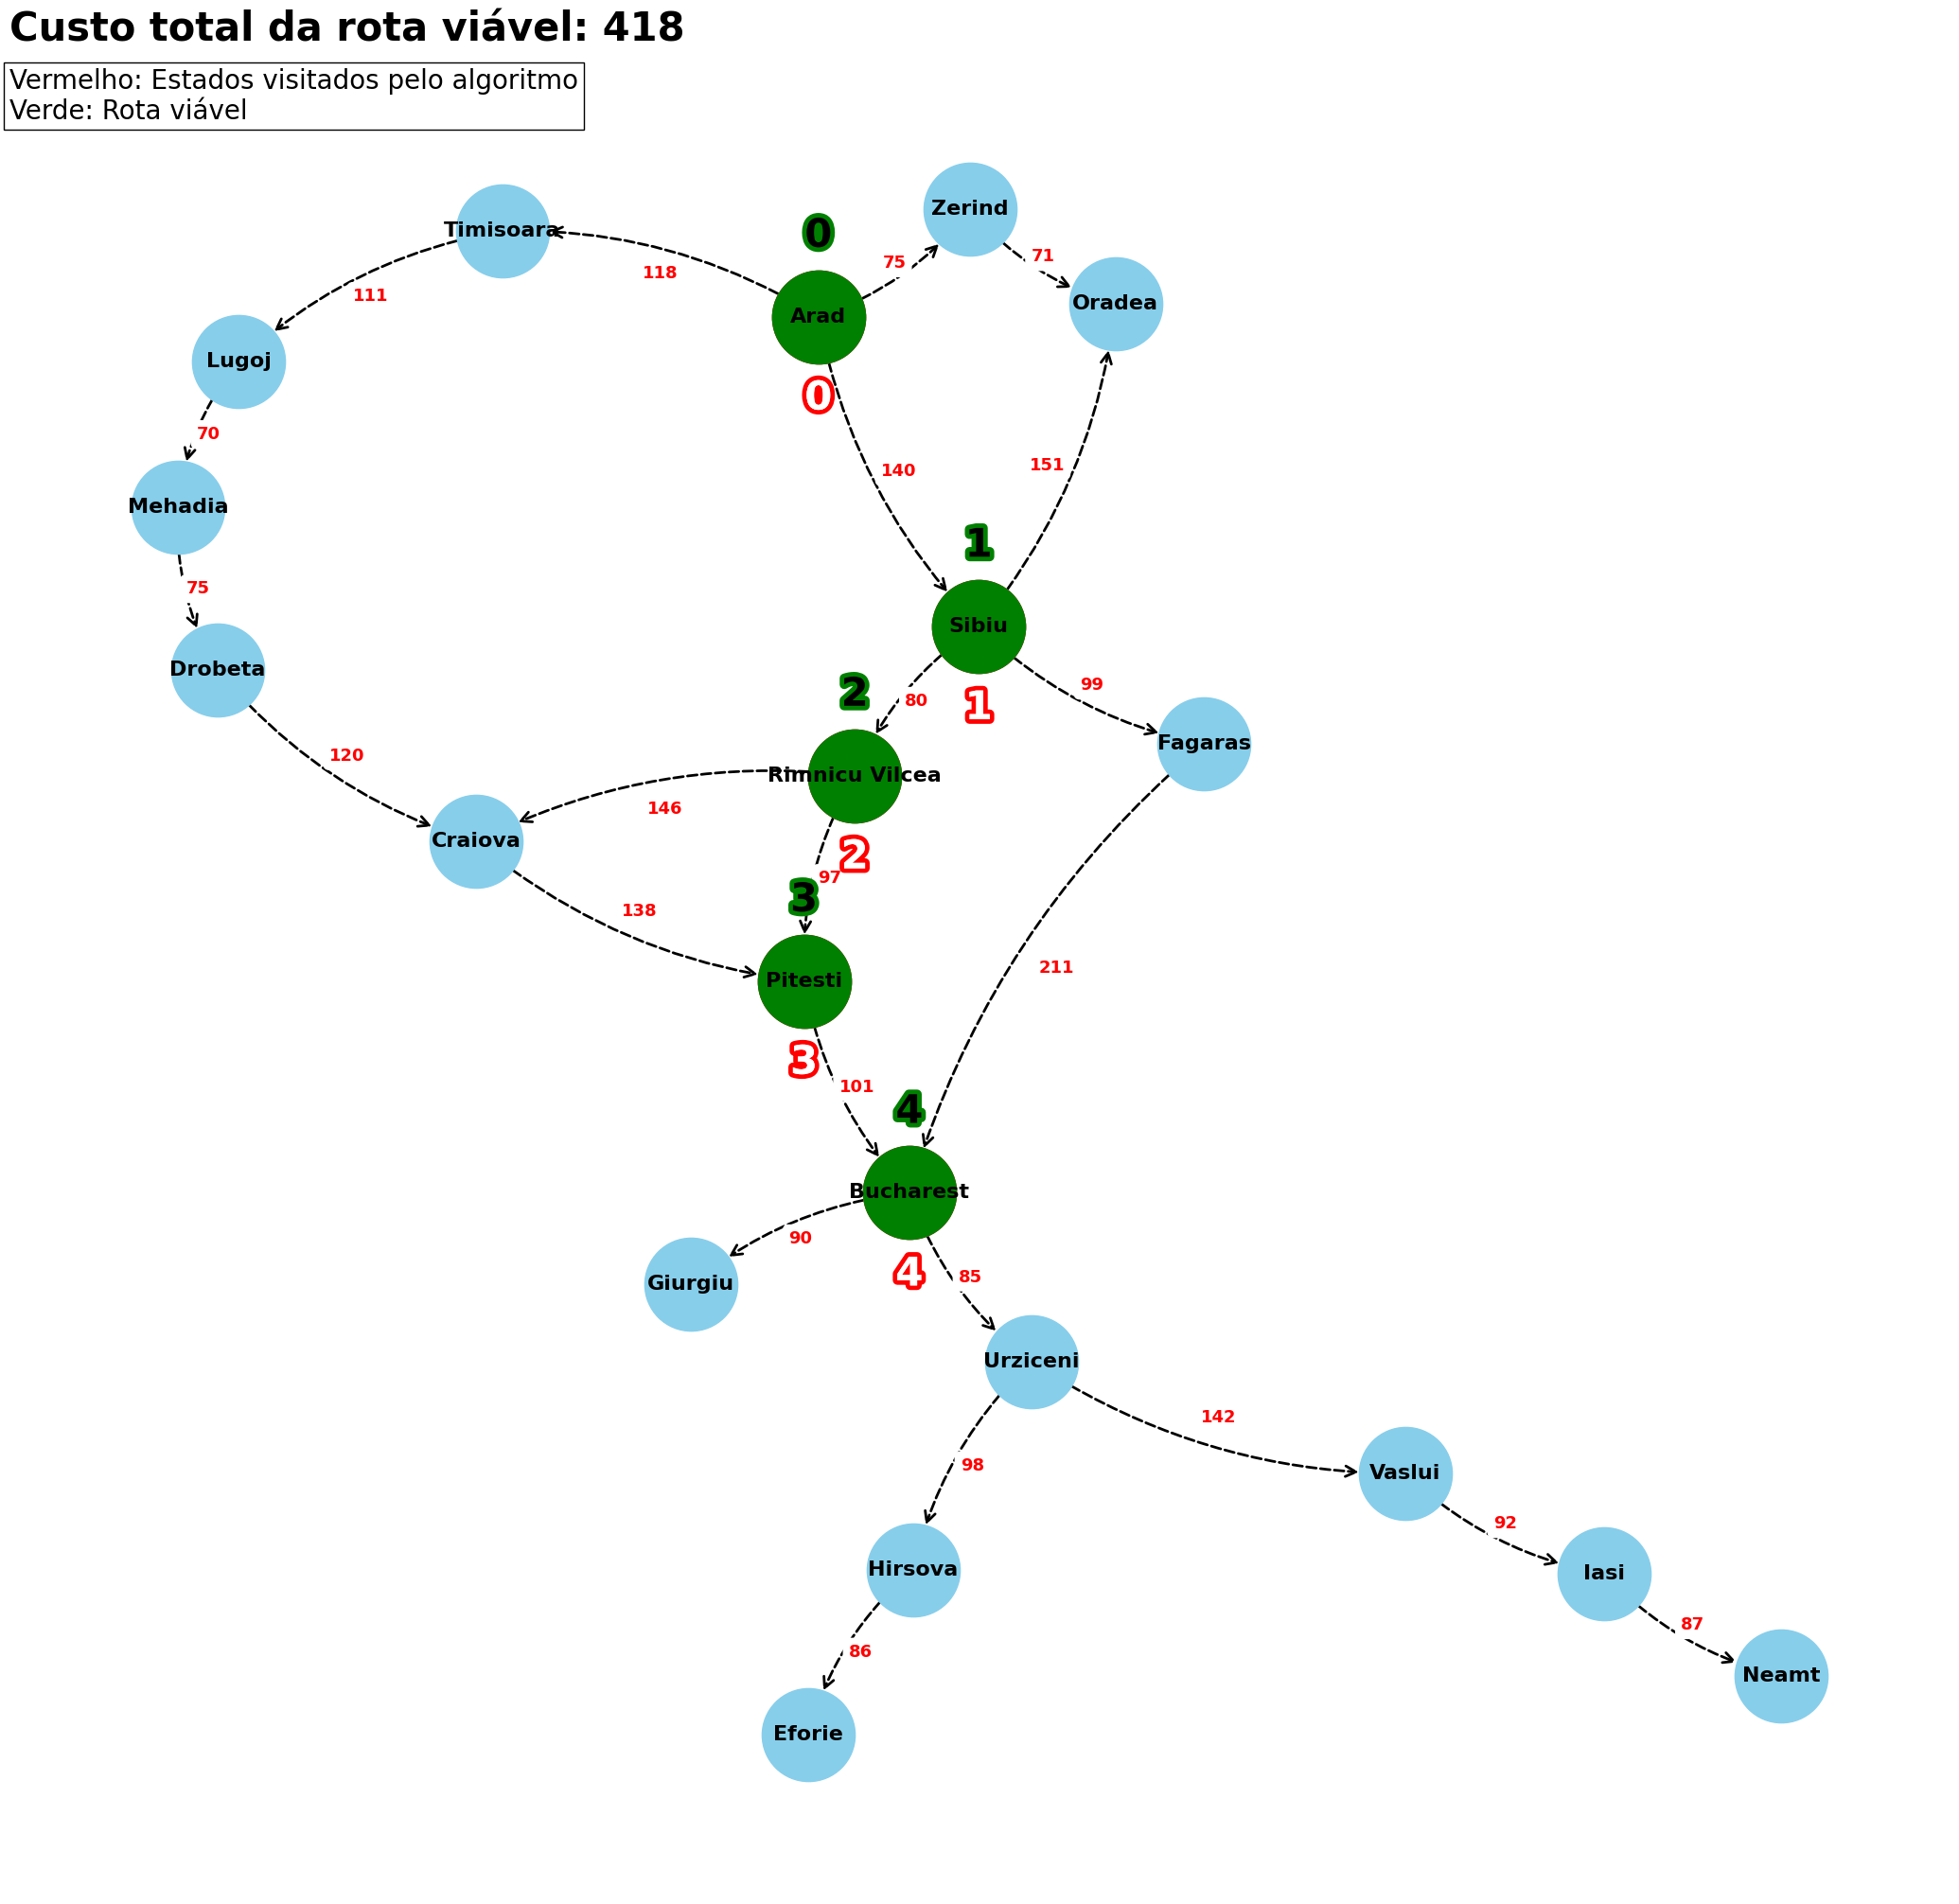

In [98]:
print(f"O menor custo encontrado pelo algoritmo DFS foi de {arad_bucharest_dfs_custos['lowest_cost']}")
print(f"O maior custo encontrado pelo algoritmo DFS foi de {arad_bucharest_dfs_custos['highest_cost']}")
print(f"O menor custo encontrado pelo algoritmo BFS foi de {arad_bucharest_bfs_custos['lowest_cost']}")
print(f"O maior custo encontrado pelo algoritmo BFS foi de {arad_bucharest_bfs_custos['highest_cost']}")

#O menor custo encontrado pelo algoritmo DFS foi de 418
highlight_path(arad_bucharest_dfs_custos['lowest_cost_path'], arad_bucharest_dfs_custos['lowest_cost'], arad_bucharest_dfs_custos['lowest_cost_path'])

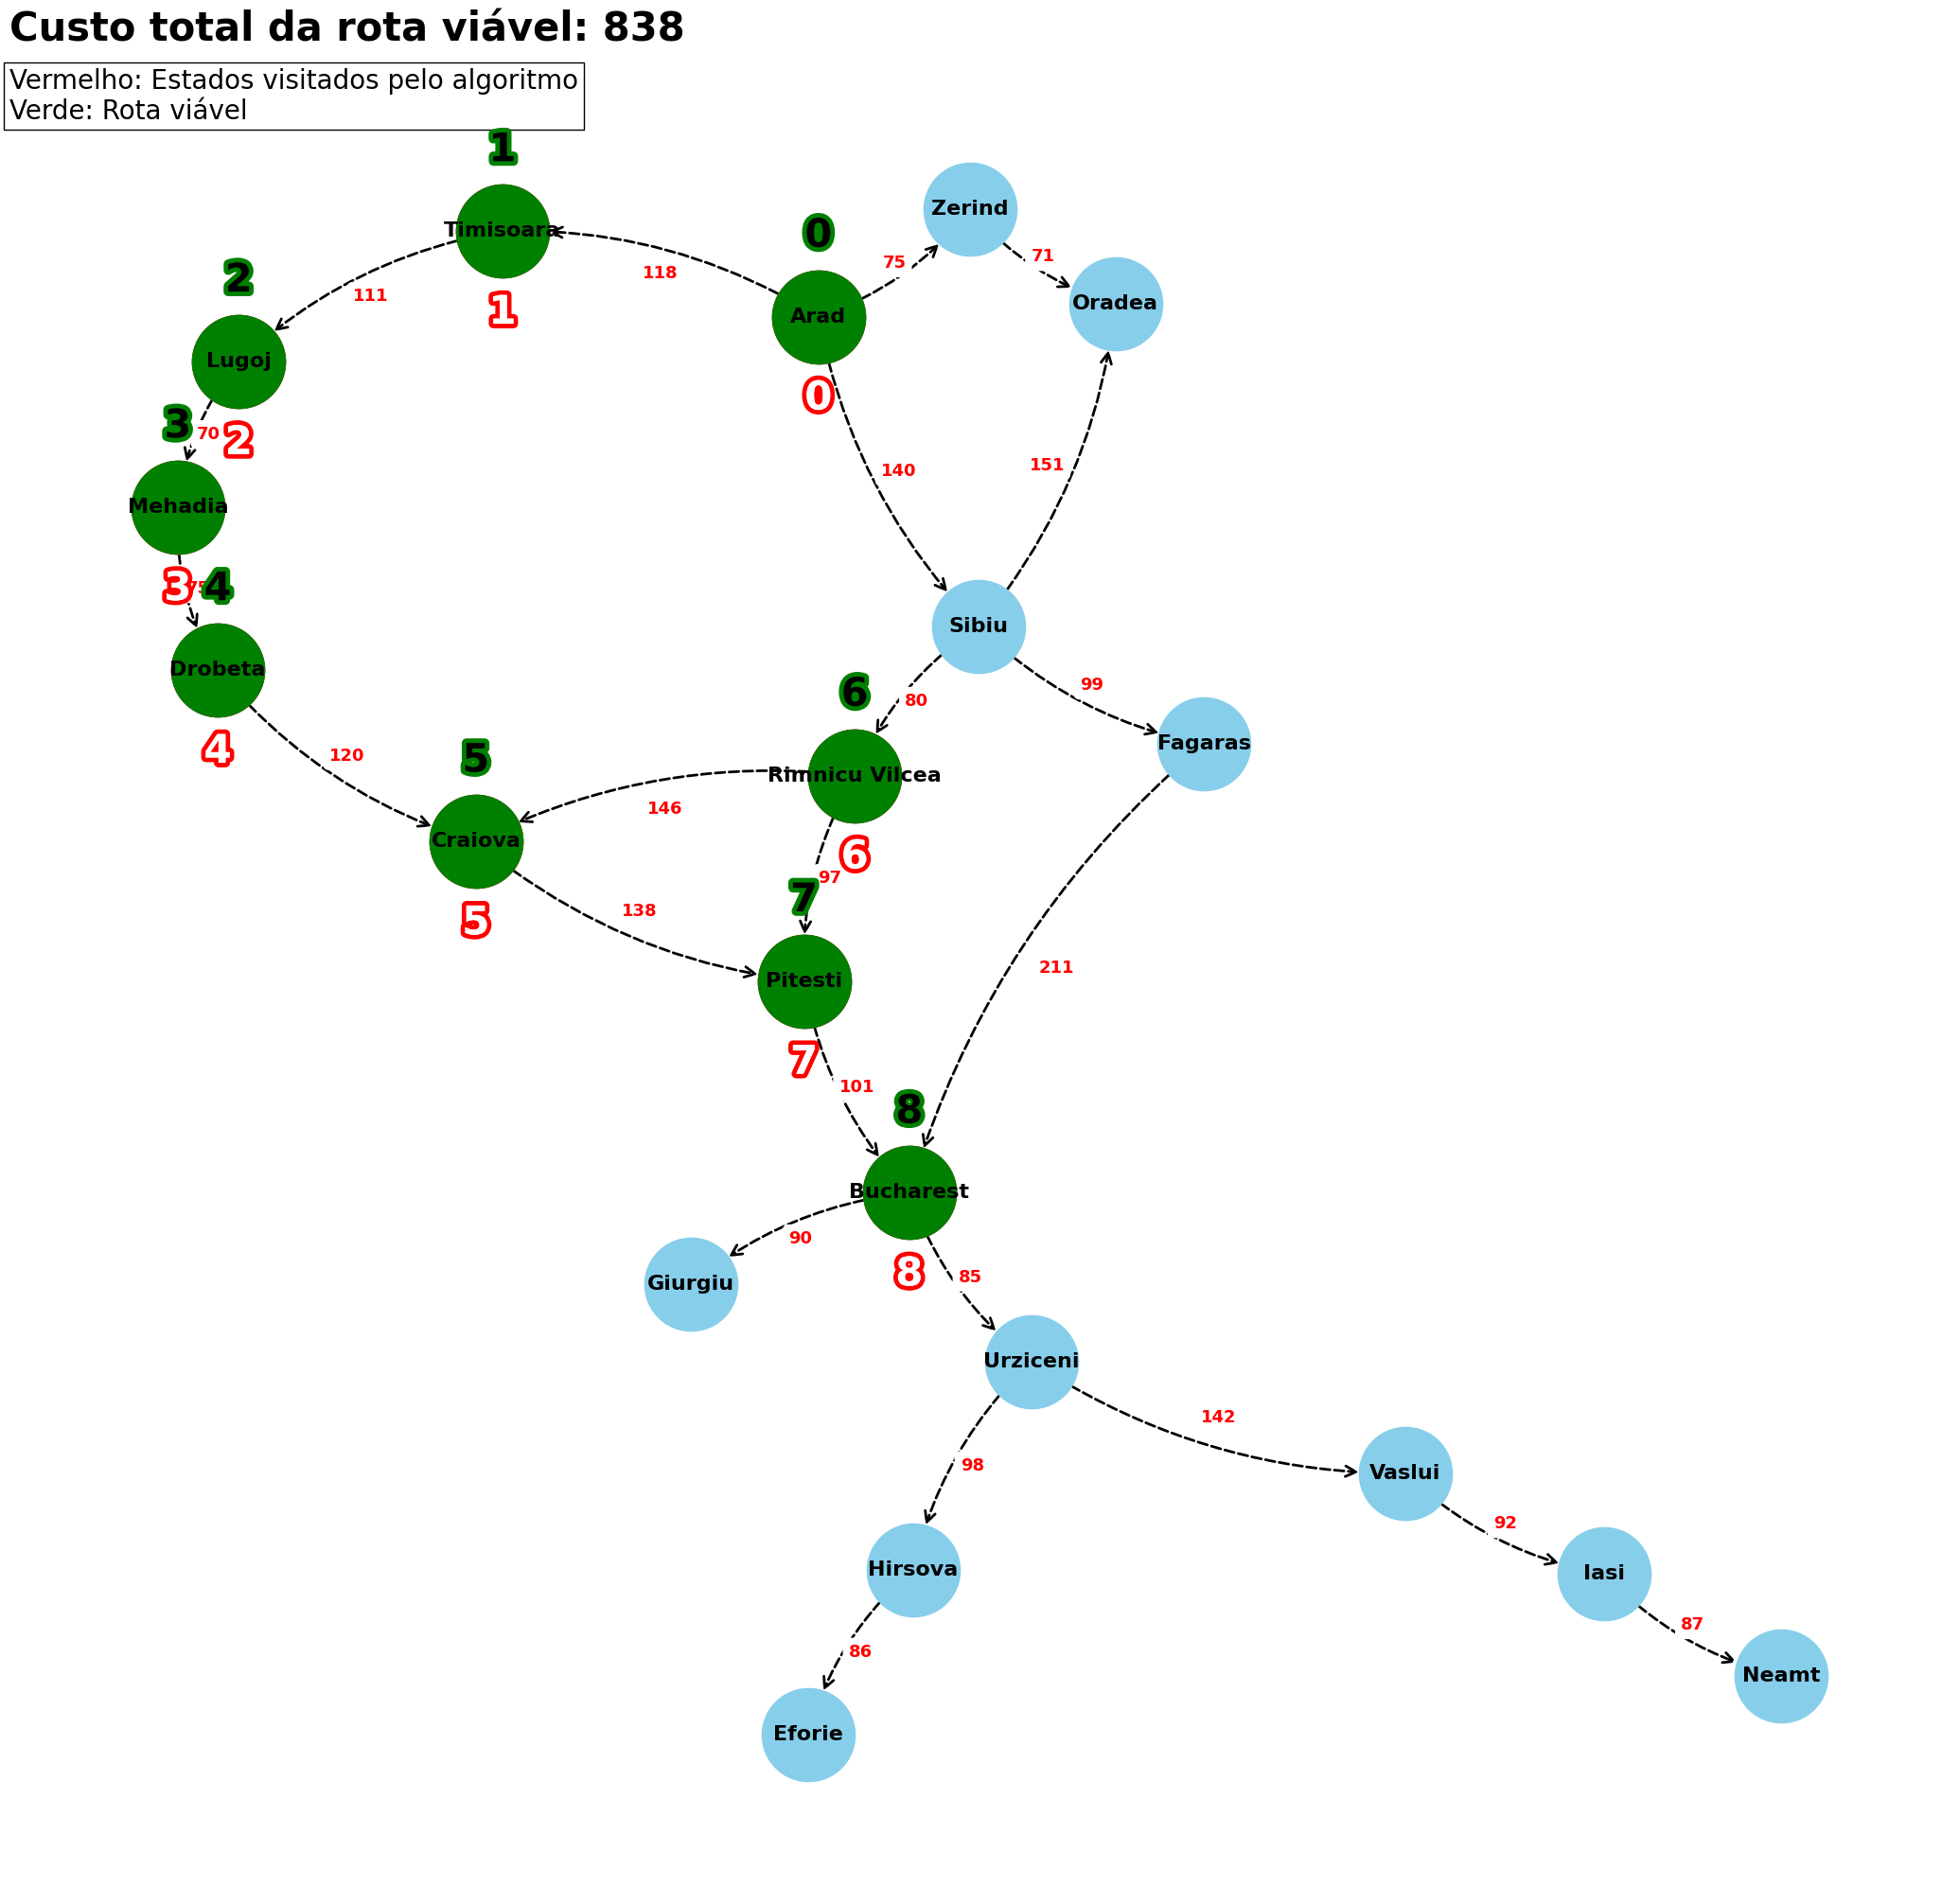

In [100]:
#O maior custo encontrado pelo algoritmo DFS foi de 838
highlight_path(arad_bucharest_dfs_custos['highest_cost_path'], arad_bucharest_dfs_custos['highest_cost'], arad_bucharest_dfs_custos['highest_cost_path'])

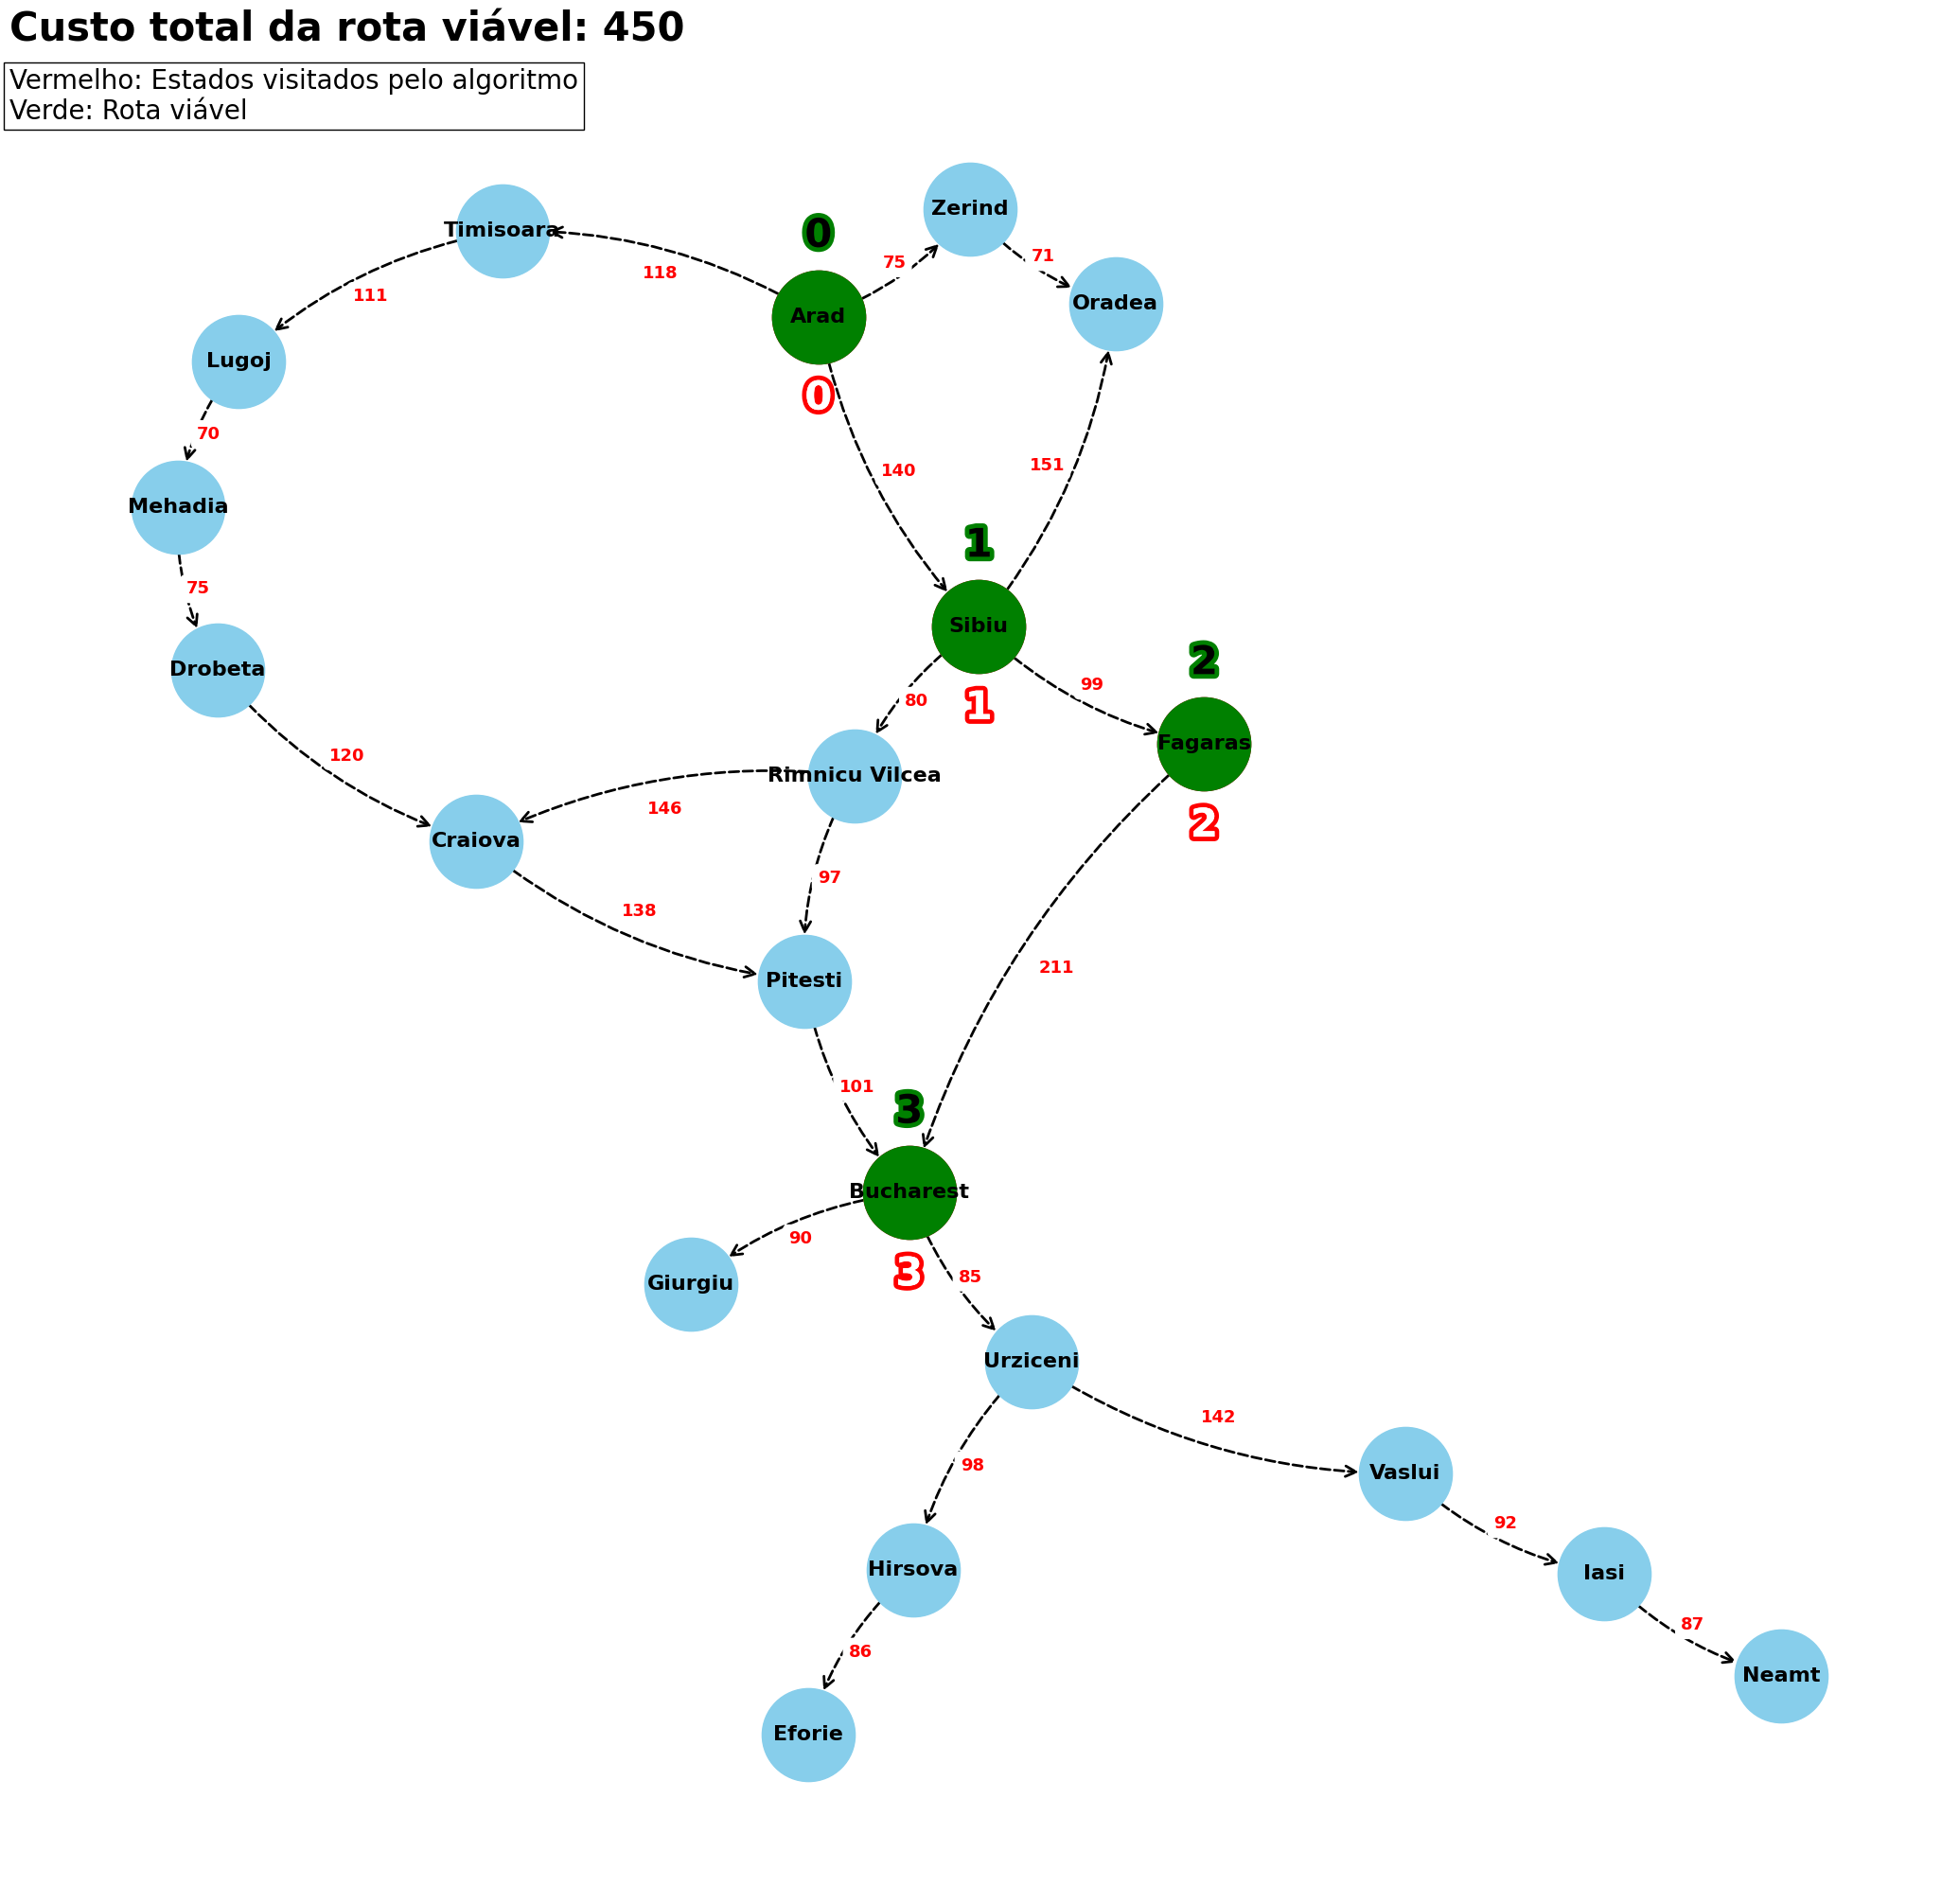

In [101]:
#O menor custo encontrado pelo algoritmo BFS foi de 450, e foi igual ao maior custo encontrado pelo algoritmo BFS.
highlight_path(arad_bucharest_bfs_custos['lowest_cost_path'], arad_bucharest_bfs_custos['lowest_cost'], arad_bucharest_bfs_custos['lowest_cost_path'])